In [1]:
'''
This is a set of preliminary analysis methods.

I'm not looking for anything in particular, just testing out a variety of things
to learn what the data looks like
'''

#these tell the jupyter notebook to reload the various libraries you import
#normally this doesn't happen. If you are modifying functions called, lets say in noptrexAnalysis, they won't update in this code without doing this
%load_ext autoreload
%autoreload 2


In [4]:
from os import listdir #use these two includes for grabbing all files in a directory
from os.path import isfile, join
import os
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

import noptrexAnalysis as na
from matplotlib.image import NonUniformImage

na.plt.rcParams["figure.figsize"] = (10,5)
pictureDir = '/home/daqpearl/david/dataFiles/newFiles/Pictures/'

#grab all of the data file names
fileDir = '/home/daqpearl/david/dataFiles/newFiles/'
tempFileNames = [f for f in listdir(fileDir) if isfile(join(fileDir, f))] #grab all files that are actually files, not directories
tempFileNames = [fileDir + fileName for fileName in tempFileNames] #now add the path to the files onto each one
#make sure they all end in .bin
dataFileNames = []
for file in tempFileNames:
    name, extension = os.path.splitext(file)
    if extension == '.bin':
        dataFileNames.append(file)

In [5]:
#now make the histogram storage containers and whatnot
numDataPoints = 500000
numTimeBins = int(numDataPoints/100)
numEnerBins = 1000

#the left edges of the histogram bins
timeHistBins = na.np.arange(numTimeBins)
enerHistBins = na.np.arange(numEnerBins)

#storage for the histograms themselves
timeHist = na.np.zeros(numTimeBins)
enerHist = na.np.zeros(numEnerBins)

In [10]:
#load in the data file
fileNum = 0
dataFile = na.dataFile(dataFileNames[fileNum])

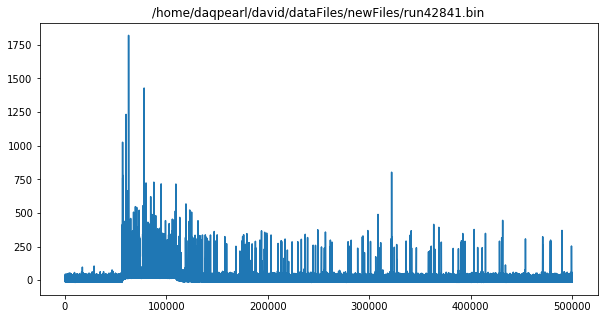

In [12]:
#plot some initial information from the waveform
waveNum = 1
wave = dataFile.wave(waveNum)
wave = wave[:]*-1
wave = wave[:] - na.np.mean(wave[0:1000])

na.plt.plot(wave)
na.plt.title(dataFileNames[fileNum])
na.plt.show()

In [13]:
#'''
peakX,peakY = na.findPeaksInWaveforms(dataFile)
msConversion = 10**(-5)
totPeakX = [item for sublist in peakX for item in sublist] #unpacks the list of lists into one list
totPeakX = na.np.asarray(totPeakX)[:] * msConversion
totPeakY = [item for sublist in peakY for item in sublist] #same again but for the y coordinate information'''

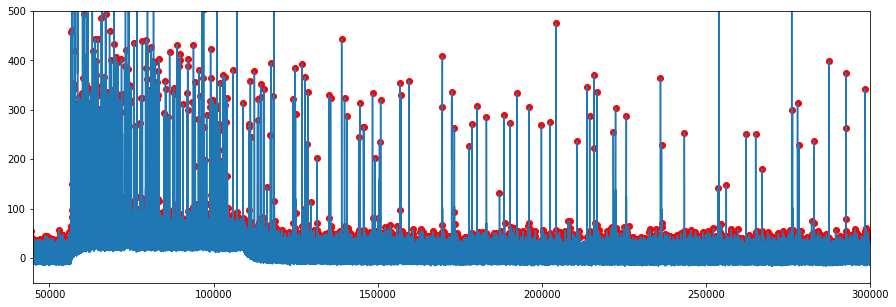

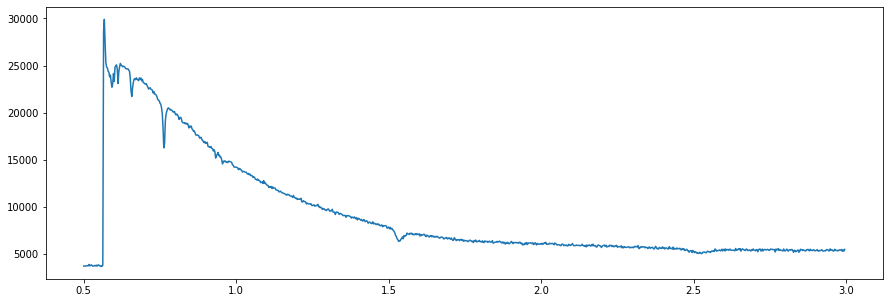

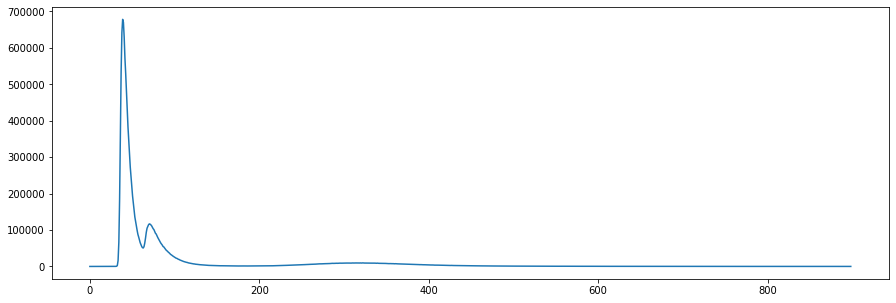

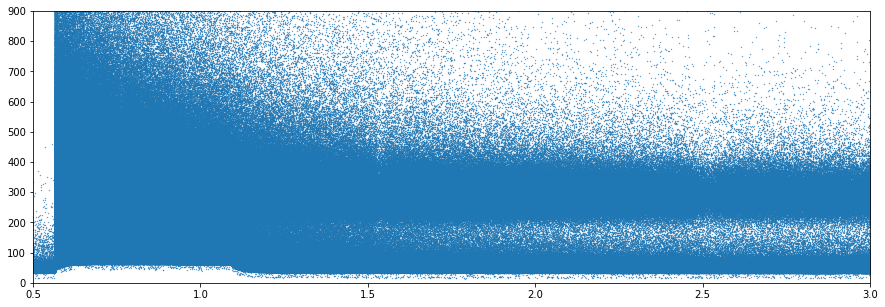

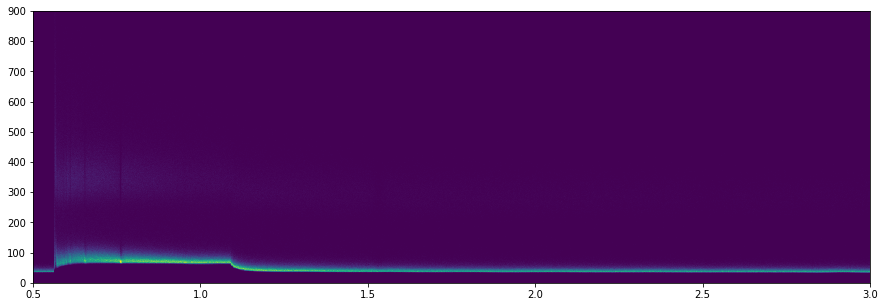

In [14]:
#'''
waveNum = 0 #waveform to plot
lowXVal = 0.5 #x data point range
highXVal = 3
numXBins = 1000

lowYVal = 0  #y data point range
highYVal = 900
numYBins = 1000
na.plt.rcParams["figure.figsize"] = (15,5)

timeBinEdges = na.np.arange(lowXVal, highXVal, (highXVal-lowXVal)/numXBins)
enerBinEdges = na.np.arange(lowYVal, highYVal, (highYVal-lowYVal)/numYBins)

wave = dataFile.wave(waveNum)

wave = wave[:]*-1
wave = wave[:] - na.np.mean(wave[0:1000])

na.plt.plot(wave)
na.plt.scatter(peakX[waveNum], peakY[waveNum], color='red')
na.plt.xlim(45000, 300000)
na.plt.ylim(-50, 500)
na.plt.show()


tempTimeHist, _ = na.np.histogram(totPeakX, bins = timeBinEdges)
tempEnerHist, _ = na.np.histogram(totPeakY, bins = enerBinEdges)

na.plt.plot(timeBinEdges[:-1], tempTimeHist)
na.plt.show()

na.plt.plot(enerBinEdges[:-1], tempEnerHist)
na.plt.show()

na.plt.scatter(totPeakX, totPeakY, s=0.1)
na.plt.xlim(lowXVal, highXVal)
na.plt.ylim(lowYVal, highYVal)
na.plt.show()

na.plt.hist2d(totPeakX, totPeakY, bins=[timeBinEdges, enerBinEdges])
na.plt.xlim(lowXVal, highXVal)
na.plt.ylim(lowYVal, highYVal)
na.plt.show()
#'''

In [17]:
#load in the data files and make the histogram for each data file
fileDir = '/home/david/datafiles/noptrex/resultFiles/'
dataFileNames = [f for f in listdir(fileDir) if isfile(join(fileDir, f))] #grab all files that are actually files, not directories
dataFileNames = [fileDir + fileName for fileName in dataFileNames] #now add the path to the files onto each one

/home/david/datafiles/noptrex/resultFiles/run38826.csv


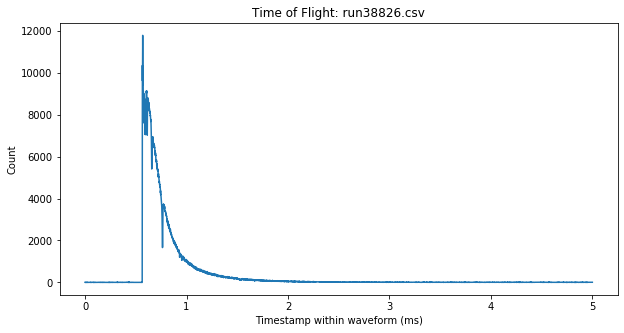

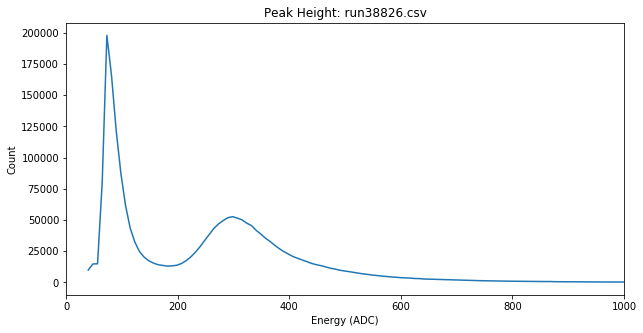

/home/david/datafiles/noptrex/resultFiles/run38328.csv


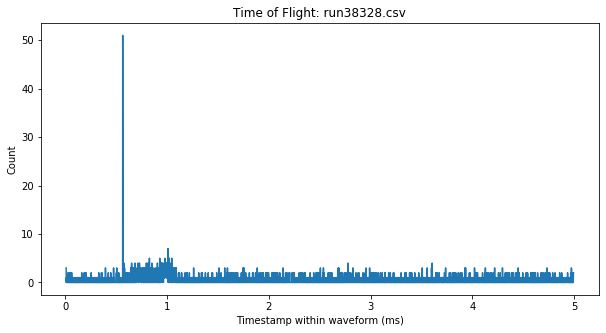

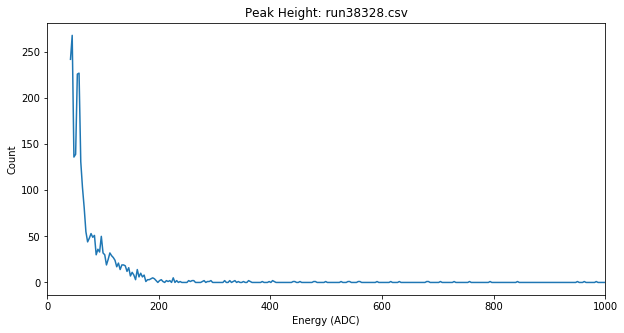

/home/david/datafiles/noptrex/resultFiles/run38833.csv


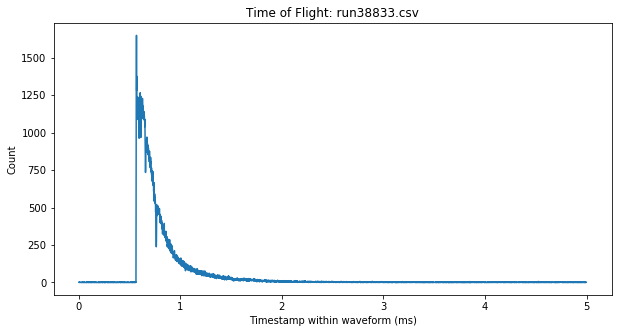

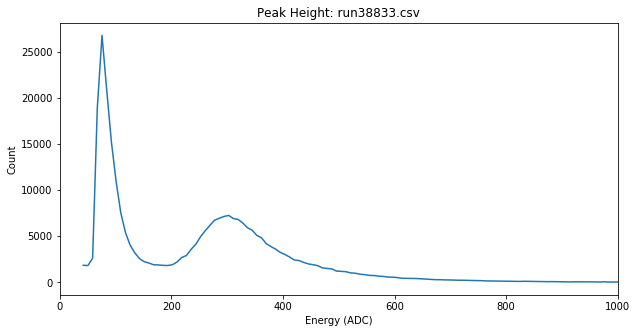

/home/david/datafiles/noptrex/resultFiles/run39288.csv


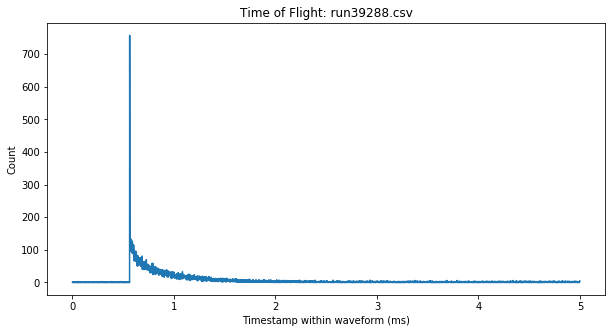

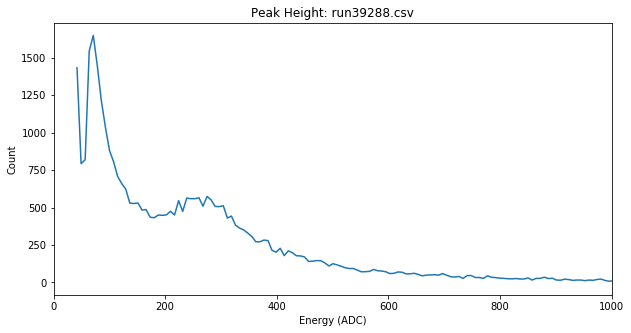

/home/david/datafiles/noptrex/resultFiles/run38325.csv


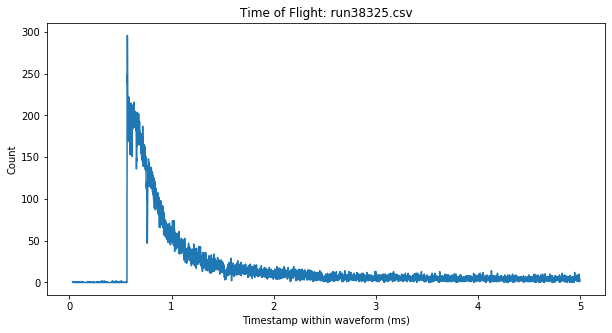

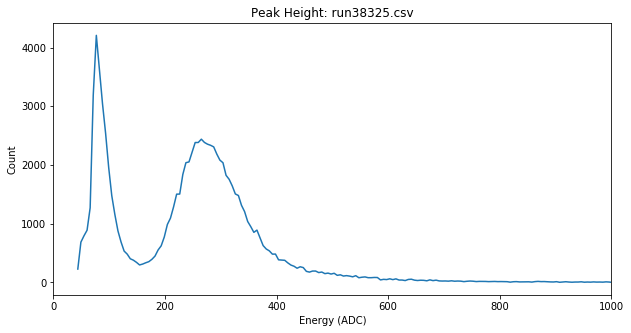

/home/david/datafiles/noptrex/resultFiles/run38832.csv


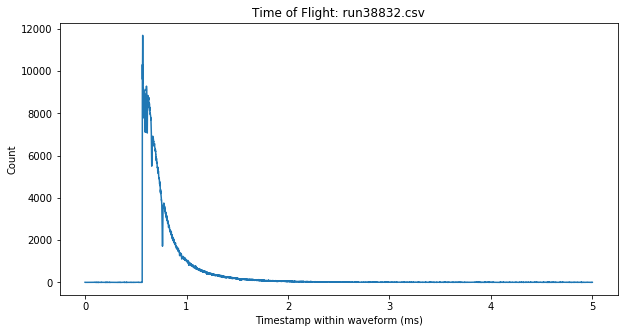

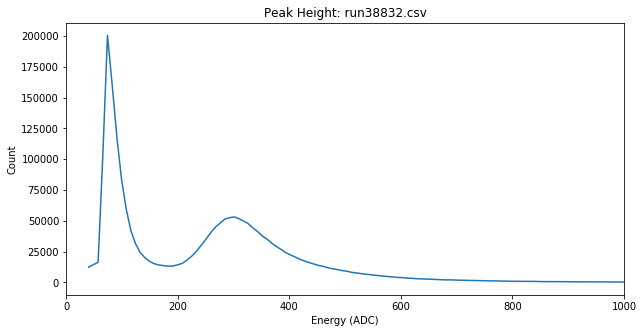

/home/david/datafiles/noptrex/resultFiles/run38824.csv


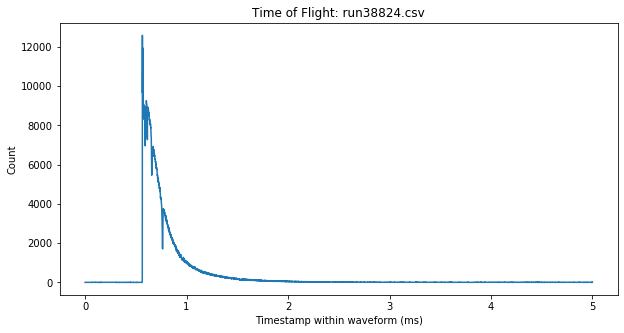

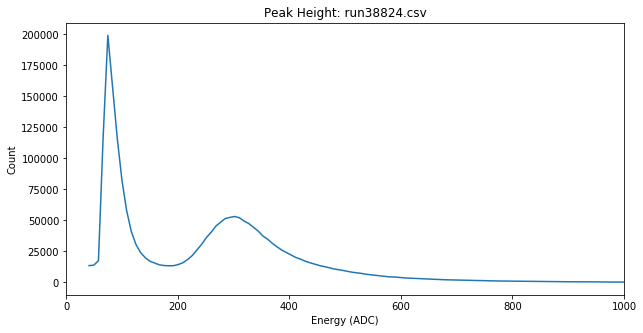

/home/david/datafiles/noptrex/resultFiles/run38827.csv


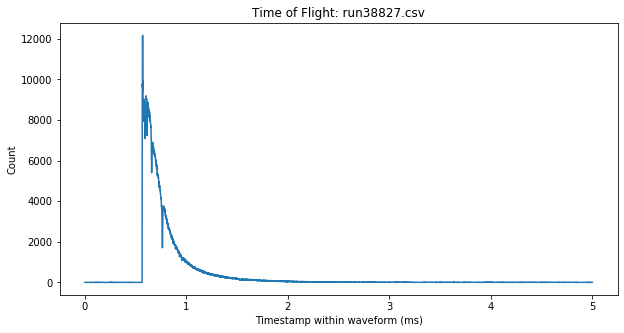

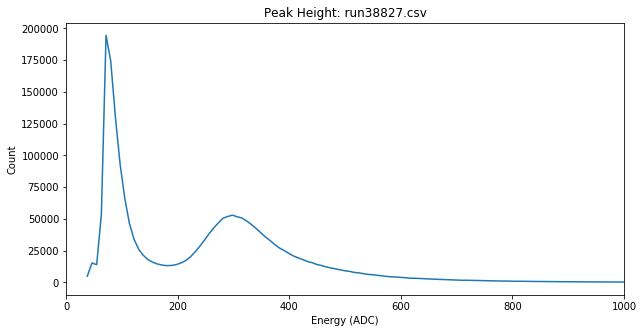

/home/david/datafiles/noptrex/resultFiles/run38828.csv


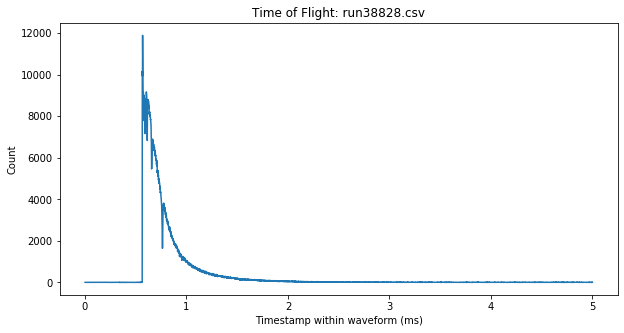

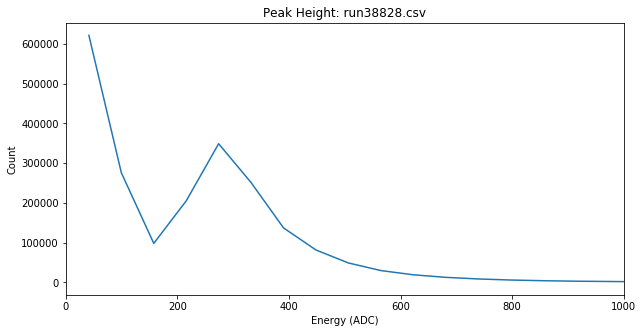

/home/david/datafiles/noptrex/resultFiles/run38530.csv


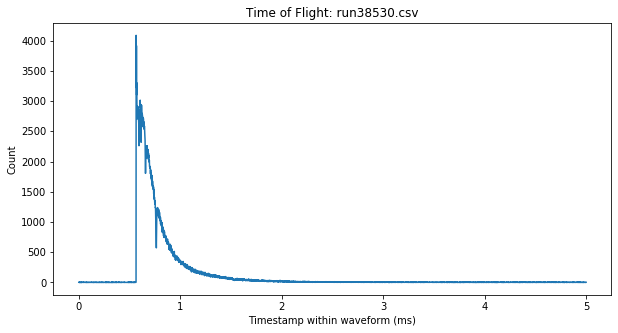

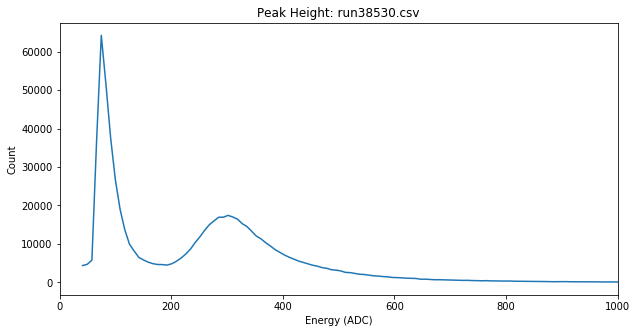

/home/david/datafiles/noptrex/resultFiles/run38820.csv


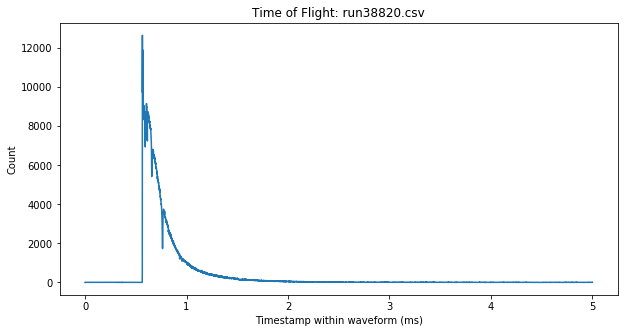

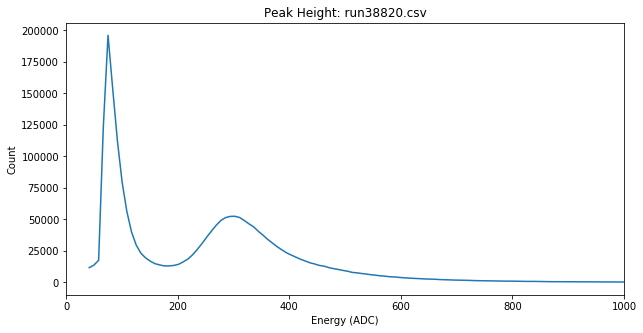

/home/david/datafiles/noptrex/resultFiles/run38829.csv


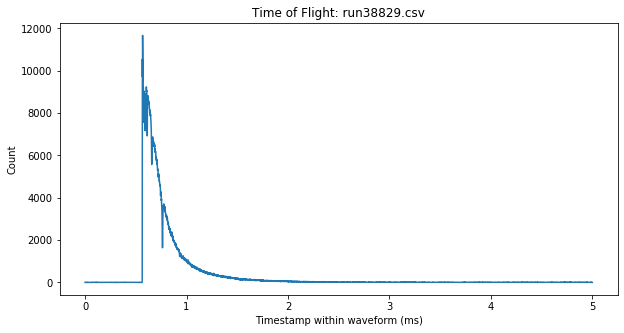

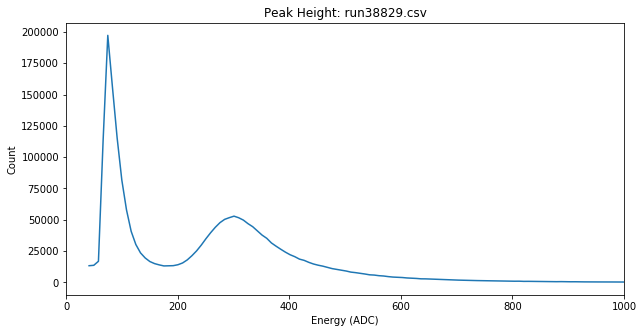

/home/david/datafiles/noptrex/resultFiles/run38326.csv


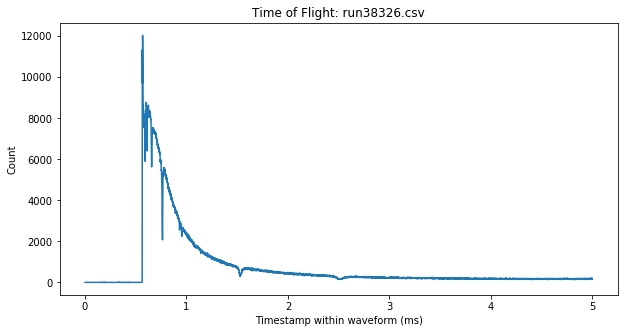

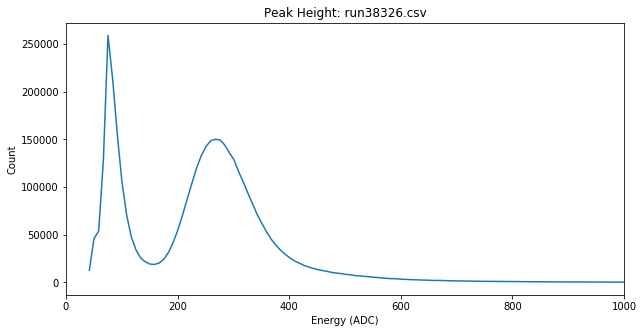

/home/david/datafiles/noptrex/resultFiles/run38823.csv


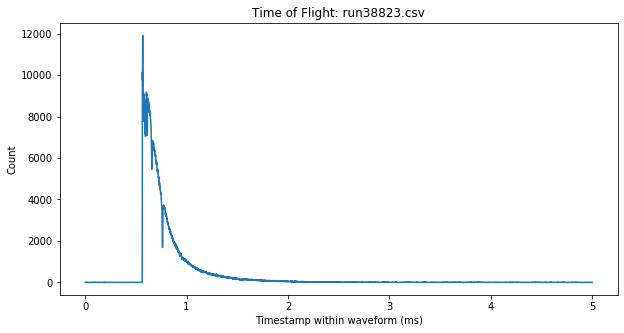

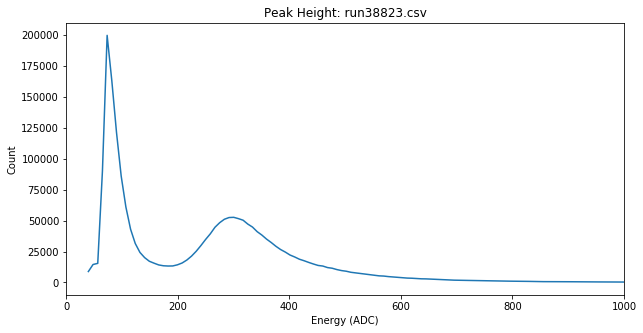

/home/david/datafiles/noptrex/resultFiles/run38822.csv


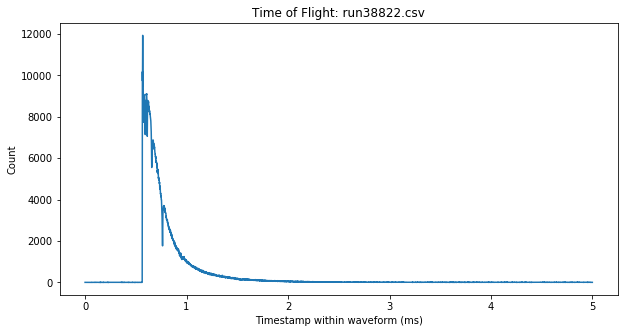

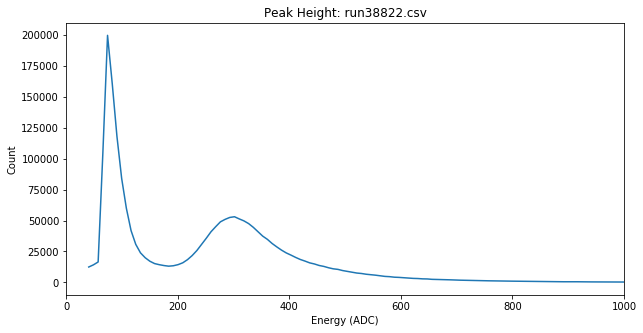

/home/david/datafiles/noptrex/resultFiles/run38831.csv


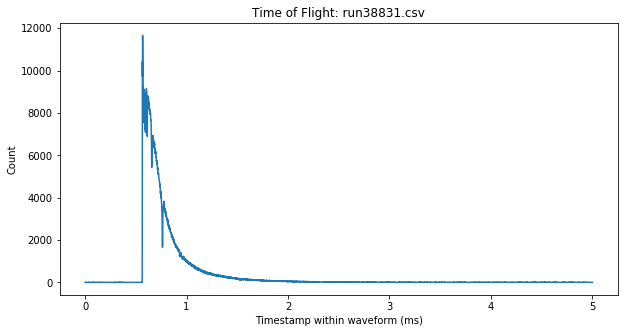

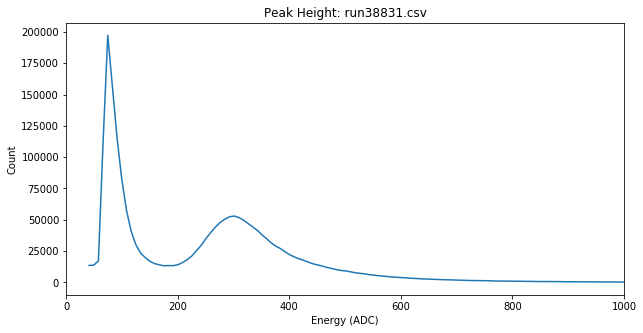

/home/david/datafiles/noptrex/resultFiles/run38825.csv


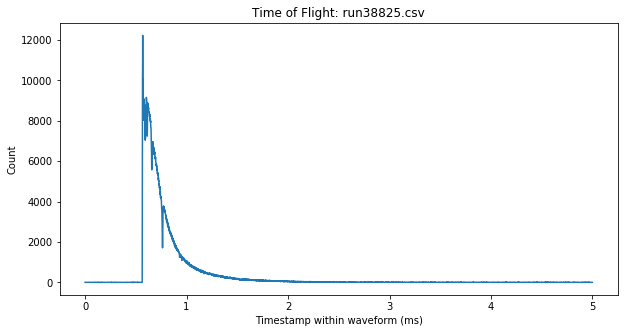

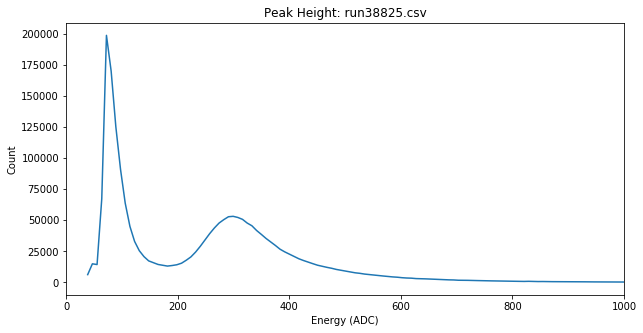

/home/david/datafiles/noptrex/resultFiles/run38830.csv


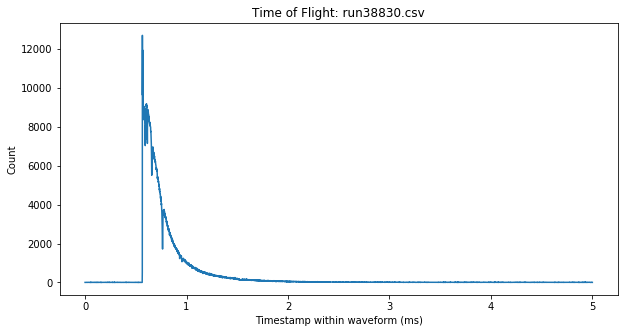

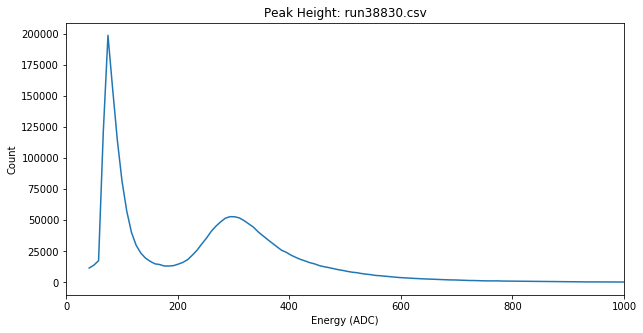

/home/david/datafiles/noptrex/resultFiles/run38821.csv


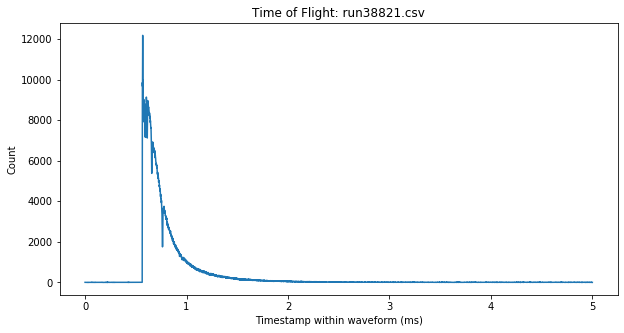

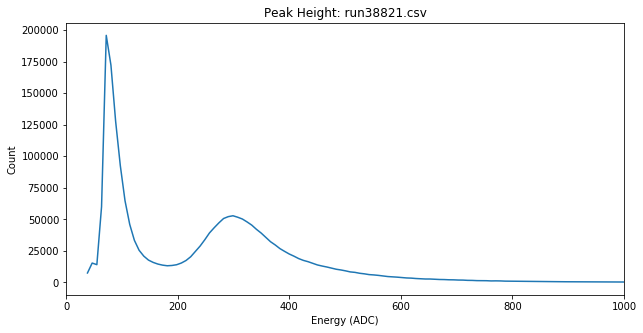

In [20]:
for file in dataFileNames:
    #load the results in
    #load the file into RAM
    print(file)
    dataFile = na.np.loadtxt(file, delimiter = ', ')
    totPeakX = dataFile[0][:]
    totPeakY = dataFile[1][:]
    
    
    #now make the histograms, the _ indicates a returned variable we don't care about
    timeHist, timeHistBins = na.np.histogram(totPeakX, bins = numTimeBins)
    enerHist, enerHistBins = na.np.histogram(totPeakY, bins = numEnerBins)
    
    timeHistBins = timeHistBins[:] 
    #get the name of the output file
    filename = os.path.basename(file)
    #remove the extension
    inputName, inputExtension = os.path.splitext(file)
    
    na.plt.plot(timeHistBins[:-1], timeHist)
    na.plt.title('Time of Flight: '+filename)
    na.plt.xlabel('Timestamp within waveform (ms)')
    na.plt.ylabel('Count')
    na.plt.savefig(pictureDir+'timeOfFlight'+filename+'.png')
    na.plt.show()
    
    na.plt.plot(enerHistBins[:-1], enerHist)
    na.plt.title('Peak Height: '+filename)
    na.plt.xlabel('Energy (ADC)')
    na.plt.ylabel('Count')
    na.plt.xlim(0,1000)
    na.plt.savefig(pictureDir+'energyFromPeaks'+filename+'.png')
    na.plt.show()

    
    #now plot this information
    

In [ ]:
#make a histogram of when these peaks occur within the waveform
fileLen = 500000 * 10 /(10**9) * 10**3 #length of file in ms
binWidth = fileLen / numTimeBins

timeHistBins = timeHistBins[:] * binWidth

na.plt.plot(timeHistBins, timeHist)
na.plt.title('Analysis of Time of Flight')
na.plt.xlabel('Timestamp within waveform (ms)')
na.plt.ylabel('Count')
na.plt.savefig(pictureDir+'timeOfFlight.png')
na.plt.show()


In [ ]:
#now look at the "energies" from the peak information
na.plt.plot(enerHistBins, enerHist)
na.plt.title('Analysis of "Energy"')
na.plt.xlabel('Energy (ADC)')
na.plt.ylabel('Count')
na.plt.xlim(0,1000)
na.plt.savefig(pictureDir+'energyFromPeaks.png')
na.plt.show()


In [ ]:
massiveXList = [item for sublist in massiveXList for item in sublist]
massiveYList = [item for sublist in massiveYList for item in sublist]

In [ ]:
massiveXList = na.np.asarray(massiveXList)[:] * 10**(-5)
massiveYList = na.np.asarray(massiveYList)

In [ ]:
lowXVal = 0.5 #x data point range
highXVal = 3
numXBins = 1000

lowYVal = 0  #y data point range
highYVal = 300
numYBins = 1000

timeBinEdges = na.np.arange(lowXVal, highXVal, (highXVal-lowXVal)/numXBins)
enerBinEdges = na.np.arange(lowYVal, highYVal, (highYVal-lowYVal)/numYBins)

tempTimeHist, _ = na.np.histogram(massiveXList, bins = timeBinEdges)
tempEnerHist, _ = na.np.histogram(massiveYList, bins = enerBinEdges)

na.plt.plot(timeBinEdges[:-1], tempTimeHist)
na.plt.xlim(0.5, 3)
na.plt.ylim(0,10000)
na.plt.show()

na.plt.plot(enerBinEdges[:-1], tempEnerHist)
na.plt.show()

na.plt.scatter(massiveXList, massiveYList, s=0.1)
na.plt.xlim(lowXVal, highXVal)
na.plt.ylim(lowYVal, highYVal)
na.plt.show()

na.plt.hist2d(massiveXList, massiveYList, bins=[timeBinEdges, enerBinEdges])
na.plt.xlim(lowXVal, highXVal)
na.plt.ylim(lowYVal, highYVal)
na.plt.show()